# Analise Exploratória dos Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importar dados
dataframe = pd.read_csv('dados/tempo.csv', sep = ';')

# visualizar os primeiros
dataframe.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [7]:
dataframe.shape

(14, 5)

# Aparência

Por definição da lógica de negócio a **Aparência** deve estar em entre ***sol***, ***nublado*** e ***chuva***.

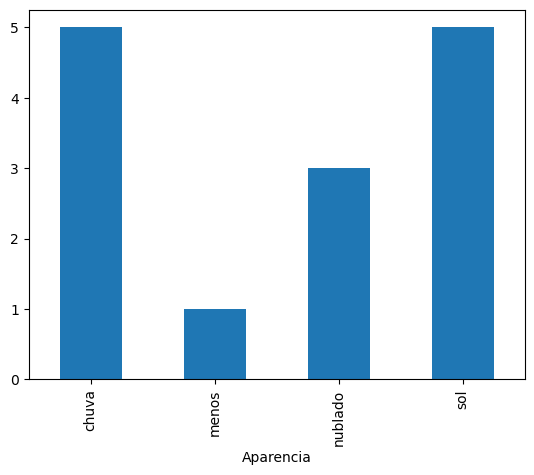

In [23]:
aparencia = dataframe.groupby(['Aparencia']).size()
aparencia.plot.bar()
plt.show()

Há um dado que está fora do padrão. Uma solução para isso é escolher o valor modal, porém possuímos uma distribuição bimodal. Nesse caso, você é preciso considerar qual dos valores modais é mais adequado de acordo com a lógica de negócio do problema.

A lógica de negócio aqui não é tão bem definida, assim, a escolha se dara de forma aleatória, já que ambos valores modais são aceitáveis.

# Temperatura

Nesse *dataset* a **Temperatura** é definida em grau fahrenheit, como ele é um dado númerico podemos ver se há valores nulos além de uma descrição rápida sobre os valores.

In [4]:
dataframe['Temperatura'].isnull().sum()

0

In [31]:
dataframe['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

O primeiro código mostra que não há valores nulos na coluna, porém na descrição há informações interessantes sobre os valores. Ah 3 valores para se observar aqui! A ***média***, a ***mediana*** e o ***maior valor***. Isso pois o **maior valor** nos indicar algo de estranho já que ele se destoa da ***média*** e a ***mediana***.

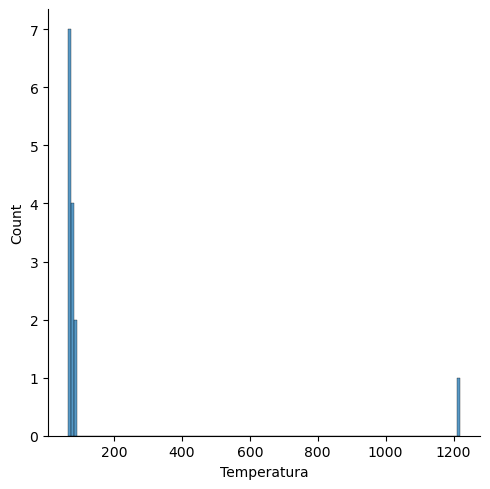

In [25]:
grafico_temperatura = sns.displot(dataframe['Temperatura'])
plt.show()

Ao fazer o gráfico da distribuição, fica visível uma *outlier* próxima do valor de $ 1200 $ que é justamente a temperatura de $ 1220 $ encontrada na descrição anterior.

Aqui, a solução de tratamento para esse valor é substituí-lo pela a ***mediana*** dos valores. É importante ressaltar que o uso da ***mediana*** é fundamental já que a ***média*** sofreu um enviesamento por parte do dado errado. A ***média*** é uma medida que usa como base todos os dados da coluna do *dataset*, enquanto a ***mediana*** usa o valor central do conjunto ordenado.

Por mais que haja na lógica de negócio um limite inferior e limite superior para o *dataset*, uma outra medida que pode vir a ser interessante para uma busca inicial por *outliers* é a medida de ***desvio padrão***, podendo por momentos aferir que os dados 3 vezes acima ou abaixo do ***desvio padrão*** são *outliers* no *dataset*.

# Umidade

Assim como o dado anterior a **Umidade** é um dado numérico, assim, faremos os mesmos teste para ver se há valores nulos além de uma descrição rápida sobre os valores.

In [5]:
dataframe['Umidade'].isnull().sum()

1

In [6]:
dataframe['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Diferente de antes aqui vemos que há um dado nulo. Além disso, o valor máximo também destoa dos demais.

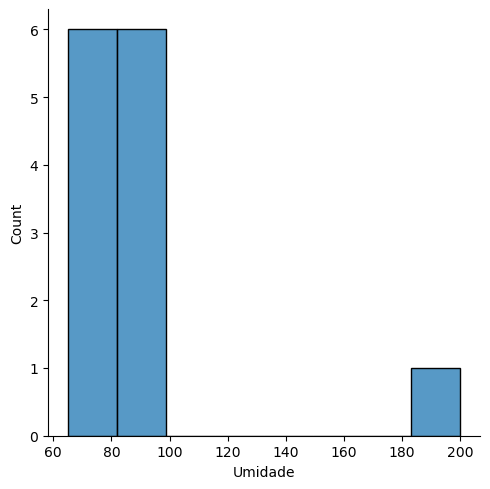

In [27]:
sns.displot(dataframe['Umidade'])
plt.show()

Aqui vemos que grande parte dos dados então distribuídos entre $ 60 $ e $ 100 $, e vemos bem que há um dado distribuído entre $ 180 $ e $ 200 $, que é nossa *outlier*. A forma de tratar isso é como anteriormente.

# Vento

Temos aqui uma coluna de valor *booleano*, entretanto em valor literal que será ou ***Verdadeiro***/***Falso***.

In [9]:
dataframe['Vento'].isnull().sum()

1

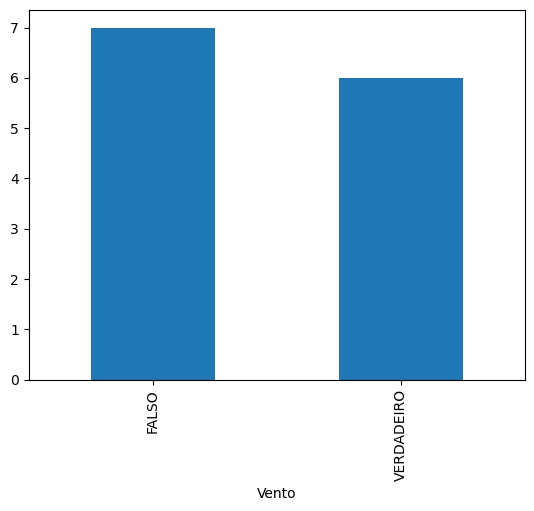

In [4]:
vento = dataframe.groupby(['Vento']).size()
vento.plot.bar()
plt.show()

Essa coluna possui um dado nulo, os demais estão dentro do padrão. A solução aqui é substituir o valor pela a moda, que é o ***Falso***.

# Jogar

Por fim, temos a coluna **Jogar**. Ela também é um valor literal que varia de ***Sim***/***Nao***.

In [10]:
dataframe['Jogar'].isnull().sum()

0

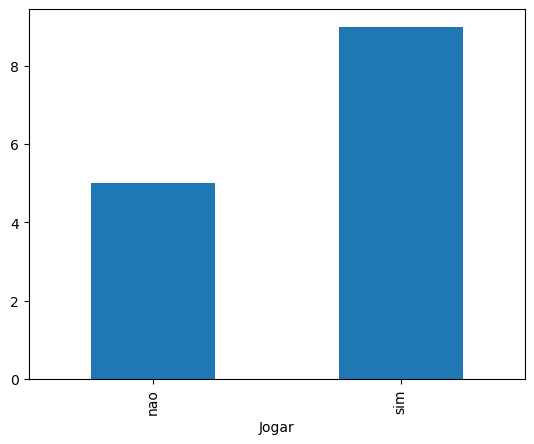

In [5]:
jogar = dataframe.groupby(['Jogar']).size()
jogar.plot.bar()
plt.show()

A coluna jogar está de acordo com a regra de negócio. Não há valores nulos, nem valores fora do padrão.